In [ ]:
### content내에 폴더 지우기
### 런타임 해제를 계속 쓰면 코랩 터질수도 있다는 jakePark 형님의 말씀
### 런타임 다시실행 후 아래 코드로 content안의 원하는 폴더와 파일을 삭제
!rm -rf /content/image_npy /content/images /content/mask_npy /content/masks /content/test_result /content/2.zip

### UPLOAD TEST DATASET

In [ ]:
## 512x512 binary label2 data
!gdown 1EnRyjGmPdMUm50qNeUHhv5Rg5NRCNidA
!unzip /content/2.zip

In [ ]:
# !git clone https://github.com/hanyoseob/youtube-cnn-002-pytorch-unet.git

### TEST1



```
result를 뽑아낸 결과 기존 마스크의 형태가 변질되어있음을 확인
처음부터 확인하기 위해 앞서 전처리 했던 방식으로 하나만 출력해봄
```



In [ ]:
import os
import PIL
import sys
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)

a = Image.open('/content/masks/mask10.png').convert("L")
a = np.array(a,dtype='float32')
# a = np.where((255 > a) & (a > 0), 0, a)
# a = np.where( a == 0, 255, 0)
# a = a/255.0 # a가 0이면 255로, 그렇지 않다면 0으로 반환 // 0 과 255 반전
# a = a.astype(bool) ## 0 = False, 그 이외의 값 = True
np.save('/content/test.npy', a)

In [ ]:
a = np.load('/content/test.npy')
a = np.where((255 > a) & (a > 0), 0, a)
a = np.where( a == 0, 255, 0)
a = a/255.0 # a가 0이면 255로, 그렇지 않다면 0으로 반환 // 0 과 255 반전
np.save('/content/test1.npy', a)

In [ ]:
 a = np.load('/content/test1.npy')
 plt.imsave(os.path.join('/content', 'test.png'), a.squeeze(), cmap='gray')

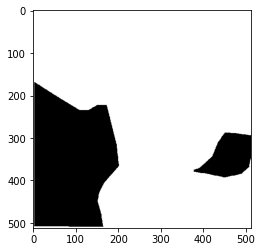

In [ ]:
test = Image.open('/content/test.png')
plt.imshow(test)

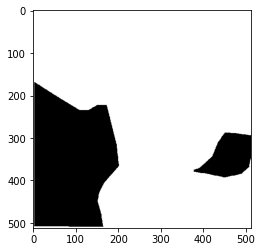

In [ ]:
test = Image.open('/content/test.png')
plt.imshow(test)



```
1. dataloader에서 전처리부분을 그대로 가져와 한장으로 테스트
2. 이미지를 저장하는 방식 역시 그대로 가져와서 테스트

- npy로 바꿔줄 때 for문 안에서 전처리 시도 >>> 마스크이미지를 png로 불러올 때 문제없음
- npy로 바꿔줄 때 for문 밖에서 전처리 시도 >>> 역시 문제없음
```



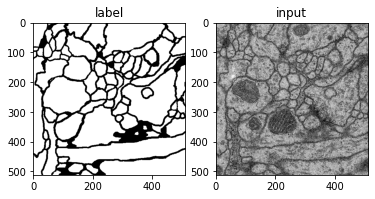

In [ ]:
## 필요한 패키지 등록
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 데이터 불러오기
dir_data = '/content/youtube-cnn-002-pytorch-unet/datasets'

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

##
nframe_train = 24
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)

if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)

if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)

##
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

##
offset_nframe = 0

for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)

##
offset_nframe = nframe_train

for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i), input_)

##
offset_nframe = nframe_train + nframe_val

for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i), input_)

##
plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()

In [ ]:
a = np.load('/content/youtube-cnn-002-pytorch-unet/datasets/val/label_000.npy')
a

array([[255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,
          0,   0, 255, 255, 255, 255, 255, 255, 255

### TEST2



```
위 테스트 후, 이미지 하나만을 가져와 png -> npy -> png 로 다시 불러왔을 때 이상이 없었음을 확인
이를 토대로 for문을 다시 작성하여 실험해봄
```



In [ ]:
!mkdir dataset
!mkdir /content/dataset/train

In [ ]:
import os
import PIL
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm

## train.png -> .npy
img_path = '/content/images/'
mask_path = '/content/masks/'
new_path = '/content/dataset/train/'
img_lst = os.listdir(img_path)
mask_lst = os.listdir(mask_path)

for i , j in zip(tqdm(img_lst),mask_lst):
  dir = img_path + i
  dir2 = mask_path + j
  img_npy = Image.open(dir).convert("L") # grayscale 로 불러옴
  img_npy = np.array(img_npy, dtype="float32") # dtype='float32', 불러온 이미지를 array형태로 바꿈
  np.save(new_path + i[:-4] + '.npy',img_npy) # array형태로 저장

  mask_npy = Image.open(dir).convert("L")
  mask_npy = np.array(mask_npy, dtype='float32')
  mask_npy = np.where((225 > mask_npy) & (mask_npy > 0), 0, mask_npy) ## array를 0과 255 값으로만 만들어줌
  mask_npy = np.where( mask_npy == 0, 255, 0)                         ## 0과 255 값을 반전시켜줌
  mask_npy = mask_npy/255                                             ## /255를 하여 0과 1값으로 만들어줌  >>>> dataloader normalization 그대로 사용
  np.save(new_path + j[:-4] + '.npy',mask_npy)

  0%|          | 0/287 [00:00<?, ?it/s]

In [ ]:
!mkdir result

#### TEST2-1 YouTube UNet구현 그대로

In [ ]:
 import matplotlib.pyplot as plt
 dataset_path = '/content/dataset/train/'
 dataset_lst = os.listdir(dataset_path)
 result_path = '/content/result'

 for i in tqdm(dataset_lst):
      dir = dataset_path + i
      a = np.load(dir)
      plt.imsave(os.path.join(result_path, i[:-4]+'.png'), a.squeeze(), cmap='gray')

  0%|          | 0/574 [00:00<?, ?it/s]



```
png를 npy로 바꾸는 포문을 사용하여 npy파일로 저장 후 진행
한 폴더에 image, mask npy가 함께 들어가있음
image, mask을 구분하지 않고 이미지로 저장
image.png는 기존 이미지를 보존하여 순서대로 잘 불러옴
mask.png는 또다시 변질되어서 나옴
squeeze()함수로 차원을 줄여서 나온것이 문제인가 의심
```



#### TEST2-2 mask는 squeeze X

In [ ]:
 import matplotlib.pyplot as plt
 dataset_path = '/content/dataset/train/'
 dataset_lst = os.listdir(dataset_path)
 result_path = '/content/result'

 for i in tqdm(dataset_lst):
      dir = dataset_path + i
      if 'image' in i: # 파일 이름에 'image'가 들어가 있다면 >> 라는 조건으로 image.npy만 불러옴
          a = np.load(dir)
          plt.imsave(os.path.join(result_path, i[:-4]+'.png'), a.squeeze(), cmap='gray')
      if 'mask' in i: # 파일 이름에 'mask'가 들어가 있다면 >> 라는 조건으로 mask.npy만 불러옴
          b = np.load(dir)
          plt.imsave(os.path.join(result_path, i[:-4]+'.png'), b, cmap='gray')

  0%|          | 0/574 [00:00<?, ?it/s]



```
조건을 넣어서 한 폴더 안에서 image.npy와 mask.npy를 따로 불러옴
image.npy는 png로 저장할 때 squeeze를 그대로 진행 ( 이전에 문제없이 잘 뽑혔기 때문 )
mask.npy는 png로 저장할 때 squeeze를 빼고 진행
>> 그래도 마스크이미지가 변질되어서 나옴 / squeeze의 문제는 전혀 아니였다
>> 한 폴더 내에서 image와 mask를 같이 불러와서 경로가 섞였나 라는 의심을 가짐
```



### TEST3 이미지, 마스크 폴더 각각 따로 불러오기



```
npy -> png 로 바꿔 저장 후 result를 확인해본 결과, image.png는 순서대로 잘 불러왔으나,
mask.png 는 image.png의 마지막 저장값으로 중복되어있음
for문을 작성하여 이미지를 npy로 저장시키는 도중, 경로가 섞이거나 변수끼리 엉켜서 생긴 일이라 의심
처음부터 다시 작성
각각의 폴더에서 image, mask를 npy로 바꿔주는 작업을 각각의 for문을 만들어 진행
>> 각 for문마다 변수가 겹치는 일 없이 작성
>> 하지만 여전히 위의 문제 발생 & 마스크형태가 여전히 변질되어있음
>> 해서 함수화 시키기로 함
```



In [ ]:
!mkdir image_npy
!mkdir mask_npy
!mkdir test_result

##### png -> npy

In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

image_src = '/content/images/'
image_lst = os.listdir(image_src)
image_npy_trg = '/content/image_npy/'

def to_numpy(src, lst, target):
    for img in tqdm(lst):
      img_path = os.path.join(src,img)
      img_numpy = Image.open(img_path).convert("L")
      img_numpy = np.array(img_numpy, dtype='float32')
      np.save(target + img[:-4] + '.npy', img_numpy)

In [ ]:
to_numpy(image_src, image_lst, image_npy_trg)

  0%|          | 0/287 [00:00<?, ?it/s]

In [ ]:
masks_src = '/content/masks/'
masks_lst = os.listdir(masks_src)
masks_npy_trg = '/content/mask_npy/'

to_numpy(masks_src, masks_lst, masks_npy_trg)

  0%|          | 0/287 [00:00<?, ?it/s]

##### npy -> png

In [ ]:
img_npy_src = '/content/image_npy/'
img_lst= os.listdir(img_npy_src)
img_png_target = '/content/test_result'

def to_png(src,lst,target):
    for npy in tqdm(lst):
        npy_path = os.path.join(src, npy)
        npy_file = np.load(npy_path)
        plt.imsave(os.path.join(target, npy[:-4]+'.png'), npy_file.squeeze(), cmap='gray')

In [ ]:
to_png(img_npy_src,img_lst,img_png_target)

  0%|          | 0/287 [00:00<?, ?it/s]

In [ ]:
mask_npy_src = '/content/mask_npy/'
mask_npy_lst = os.listdir(mask_npy_src)
mask_png_target = '/content/test_result'

to_png(mask_npy_src, mask_npy_lst, mask_png_target)

  0%|          | 0/287 [00:00<?, ?it/s]



```
함수를 만들고 이를 이용하여 png -> npy -> png 작업을 다시 진행해 봄
>> image와 mask 둘 다 정상적인 전처리가 이루어짐
>> 위의 문제들 모두 해결
```

